# **Data Understanding**

### Dataset Description:
- **PatientID**: A unique identifier for each patient. It helps differentiate between individuals in the dataset.
- **Pregnancies**: Number of times the patient has been pregnant. It may influence the risk of diabetes in women.
- **PlasmaGlucose**: Plasma glucose concentration after a glucose tolerance test (mg/dL). Higher levels can indicate diabetes.
- **DiastolicBloodPressure**: Diastolic blood pressure (mm Hg). Measures the pressure in blood vessels between heartbeats.
- **TricepsThickness**: Skinfold thickness of the triceps (mm), often used to estimate body fat.
- **SerumInsulin**: Serum insulin level (μU/mL). High levels may indicate insulin resistance or diabetes.
- **BMI**: Body Mass Index (kg/m²), calculated as weight divided by the square of height. It is a measure of body fat.
- **DiabetesPedigree**: A score indicating the likelihood of diabetes based on family history. Higher values suggest a stronger genetic predisposition.
- **Age**: Age of the patient (years).
- **Diabetic**: Target variable (0 = Non-diabetic, 1 = Diabetic). Indicates whether the patient is diagnosed with diabetes.


In [1]:
import pandas as pd

# Load the dataset
file_path = "../datasets/Processed_data.csv"
data = pd.read_csv(file_path)

# Display the first few rows
data.head()


,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,BMI_Age_Ratio,ISI,BP_Age_Ratio,HighRiskPregnancy,Glucose_Insulin,Pregnancies_Age_Ratio,Metabolic_Risk,Pedigree_Glucose,Fat_Index
0,0,0,158,80,34,23,43.509726,0.981927,21,0,2.071892,2.751789,3.809524,0.000000,3634,0.000000,93.836575,155.144416,38.754863
1,1,7,103,78,25,269,29.582192,0.981927,43,1,0.687958,0.360920,1.813953,4.815706,27707,0.162791,70.194064,101.138448,27.291096
2,2,1,85,59,27,35,42.604536,0.549542,22,0,1.936570,3.361345,2.681818,1.936570,2975,0.045455,62.201512,46.711059,34.802268
3,3,0,82,92,9,253,19.724160,0.103424,26,0,0.758622,0.482021,3.538462,0.000000,20746,0.000000,64.574720,8.480809,14.362080
4,4,0,133,49,19,227,21.941357,0.174160,21,0,1.044827,0.331225,2.333333,0.000000,30191,0.000000,67.980452,23.163251,20.470678


In [2]:
df = data.copy()

# **Data Cleaning**

5. **Verify Data Cleaning**

In [3]:
# Check for missing values again
print("\nAfter Cleaning - Missing Values:\n", data.isnull().sum())

# Check for duplicates again
print(f"\nAfter Cleaning - Duplicate rows: {data.duplicated().sum()}")

# Check statistical summary again
print("\nAfter Cleaning - Statistical Summary:\n", data.describe())



After Cleaning - Missing Values:
 PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
BMI_Age_Ratio             0
ISI                       0
BP_Age_Ratio              0
HighRiskPregnancy         0
Glucose_Insulin           0
Pregnancies_Age_Ratio     0
Metabolic_Risk            0
Pedigree_Glucose          0
Fat_Index                 0
dtype: int64

After Cleaning - Duplicate rows: 0

After Cleaning - Statistical Summary:
           PatientID   Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
count  15298.000000  15298.000000   15298.000000            15298.000000   
mean    7648.500000      2.443718     108.792457               72.036606   
std     4416.296544      2.274720      27.885924               14.347187   
min        0.000000      0.000000      6

# **Random Forest**

In [4]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Diabetic'])
y = df['Diabetic'] # target

# training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                   Feature  Importance
1              Pregnancies    0.231813
0                PatientID    0.158949
14   Pregnancies_Age_Ratio    0.136978
12       HighRiskPregnancy    0.108166
6                      BMI    0.079654
8                      Age    0.065376
5             SerumInsulin    0.038579
9            BMI_Age_Ratio    0.029573
13         Glucose_Insulin    0.022533
2            PlasmaGlucose    0.021411
11            BP_Age_Ratio    0.019974
10                     ISI    0.016597
17               Fat_Index    0.015053
4         TricepsThickness    0.013983
15          Metabolic_Risk    0.011866
16        Pedigree_Glucose    0.010203
3   DiastolicBloodPressure    0.010156
7         DiabetesPedigree    0.009137


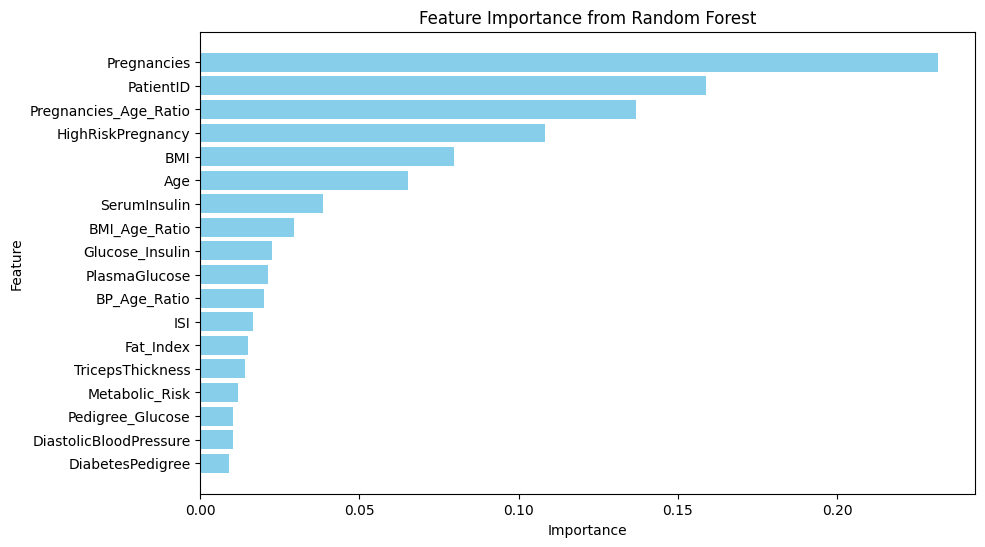

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pickle

TARGET_COLUMN = 'Diabetic'

# Split features and target
X = df.drop(columns=[TARGET_COLUMN])
y = df[TARGET_COLUMN]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Classifier
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train_scaled, y_train)

# Feature importance
feature_importances = clf.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top features
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Most important feature at the top
plt.show()


## **Model training**

**using k-fold cross validation**

**cross_val_score:** This function performs cross-validation by splitting the dataset into k folds. In this case, cv=10 specifies 10-fold cross-validation.

**scoring='accuracy':** This sets the metric used for evaluating the model's performance. You can change it to other metrics like precision, recall, or f1 if needed.

**cv_scores.mean():** This will give you the average accuracy across all folds.

**cv_scores.std():** This will provide the standard deviation of the accuracy across all folds, which gives an idea of how stable the model's performance is across different splits.

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

features_to_keep = [
    'Pregnancies', 'BMI',
    'SerumInsulin', 'Age', 'DiastolicBloodPressure',
    'PlasmaGlucose', 'TricepsThickness', 'DiabetesPedigree'
]

X_train = X_train[features_to_keep]
X_test = X_test[features_to_keep]

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=5,
    max_features='sqrt',
    bootstrap=False,
    random_state=42
)

rf_model.fit(X_train, y_train)
print("Model training complete.")


# Evaluate the model on the test set
y_pred = rf_model.predict(X_test)

print("\nTest Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model training complete.

Test Set Evaluation:
Accuracy: 0.9564

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2295
           1       0.95      0.96      0.96      2295

    accuracy                           0.96      4590
   macro avg       0.96      0.96      0.96      4590
weighted avg       0.96      0.96      0.96      4590



In [7]:
# Saving the model
with open("../models/random_forest.pkl", "wb") as file:
    pickle.dump(rf_model,file)

In [8]:
# Saving the scaler
with open("../models/rf_scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)